In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
is_local = False
if (is_local):
        print("fail")
else:
        PATH = "../input/earthquake_data/"

In [3]:
file_len = len(os.listdir(PATH))
f"파일 갯수는 {file_len!r} 입니다 "

'파일 갯수는 13 입니다 '

In [4]:
data_list = os.listdir(PATH)
data_list

['10599855_0_sigma_1_data (8th copy).csv',
 '10599855_0_sigma_1_data (copy).csv',
 '10599855_0_sigma_1_data (12th copy).csv',
 '10599855_0_sigma_1_data (11th copy).csv',
 '10599855_0_sigma_1_data (4th copy).csv',
 '10599855_0_sigma_1_data.csv',
 '10599855_0_sigma_1_data (7th copy).csv',
 '10599855_0_sigma_1_data (6th copy).csv',
 '10599855_0_sigma_1_data (another copy).csv',
 '10599855_0_sigma_1_data (5th copy).csv',
 '10599855_0_sigma_1_data (9th copy).csv',
 '10599855_0_sigma_1_data (10th copy).csv',
 '10599855_0_sigma_1_data (3rd copy).csv']

In [5]:
path = PATH + data_list[0] 
path
data_df = pd.read_csv(path, names=['time', '_x', '_y', '_z'],header=None, error_bad_lines=False )

In [6]:
signals = data_df.copy()
signals = signals.drop('time',axis=1)

In [11]:
np_signals = np.array(signals).T.reshape((1, 3, len(signals['_x'])))

In [12]:
import librosa
import librosa.display

In [19]:
sr = 20 

In [29]:
np_signals[0, 0, :].shape

(17049,)

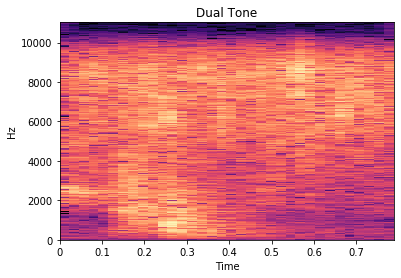

In [18]:
D = np.abs(librosa.stft(np_signals[0, 0, :]))
D = D * pow(10,6)
librosa.display.specshow(librosa.amplitude_to_db(D, ref=np.max), y_axis='linear', x_axis='time')
plt.title('Dual Tone')
#plt.ylim(0, 4000)
plt.show()

In [28]:
D
D.shape

(1025, 34)

In [25]:
y = D
D.shape
X = D
sample_rate= 20 

In [26]:
stft = np.abs(librosa.stft(X))
mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T,axis=0)
chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
contrast = np.mean(librosa.feature.spectral_contrast(S=stft, sr=sample_rate).T,axis=0)
tonnetz = np.mean(librosa.feature.tonnetz(y=librosa.effects.harmonic(X), sr=sample_rate).T,axis=0)

ParameterError: Invalid shape for monophonic audio: ndim=2, shape=(1025, 34)

STFT를 사용하면 1D에서 2d로 바뀔 수 있다
Prediction target
For 2D-CNN, we trained following 3 labels at the same time.

ttf: time to failure
tsf: time since failure
tqt: total time quake (ttf value at the beginning of quake)
tsf and tqt feature is calculated from ttf information.
I thought learning multiple label works as regularizing effect. But it was not so significant to the performance.

Hyper parameter tuning
We used optuna for hyper parameter tuning.